# Notebook summary

Explore freeform responses from 2017 Kaggle ML & DS survey

In [40]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import platform
import IPython

import numpy as np
import pandas as pd
import sklearn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import wordcloud
from wordcloud import WordCloud


print('python.version = ', platform.python_version())
print('ipython.version =', IPython.version_info)
print('numpy.version = ', np.__version__)
print('pandas.version = ', pd.__version__)
print('sklearn.version = ', sklearn.__version__)
print('matplotlib.version = ', matplotlib.__version__)
print('seaborn.version = ', sns.__version__)

print('wordcloud.version = ', wordcloud.__version__)


python.version =  3.4.3
ipython.version = (6, 2, 1, '')
numpy.version =  1.13.3
pandas.version =  0.20.3
sklearn.version =  0.19.1
matplotlib.version =  2.1.0
seaborn.version =  0.8.1
wordcloud.version =  1.3.1


<a id="import_data"/>

# Import data

In [27]:
ff = pd.read_csv("../data/raw/freeformResponses.csv")
ff.head()
ff.describe()

# Get schema to map column name to actual question
schema = pd.read_csv("../data/raw/schema.csv")
schema.head()


/usr/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,17,21,38,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderFreeForm,KaggleMotivationFreeForm,CurrentJobTitleFreeForm,MLToolNextYearFreeForm,MLMethodNextYearFreeForm,LanguageRecommendationFreeForm,PublicDatasetsFreeForm,PersonalProjectsChallengeFreeForm,LearningPlatformCommunityFreeForm,LearningPlatformFreeForm1,...,WorkMethodsFrequencySelect2FreeForm,WorkMethodsFrequencySelect3FreeForm,TimeOtherSelectFreeForm,WorkChallengesFreeForm,WorkChallengeFrequencyOtherFreeForm,WorkMLTeamSeatFreeForm,WorkDataStorageFreeForm,WorkCodeSharingFreeForm,SalaryChangeFreeForm,JobSearchResourceFreeForm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data manipulation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I can't find time to practice consistently,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,teacher,NaN,NaN,NaN,NaN,NaN,NaN,Meetups,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connectivity/data fusion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,LearningPlatformUsefulnessCommunitiesFreeForm,LearningPlatformUsefulnessFreeForm1SelectFreeForm,LearningPlatformUsefulnessFreeForm2SelectFreeForm,LearningPlatformUsefulnessFreeForm3SelectFreeForm,WorkToolsFrequencySelect1FreeForm,WorkFrequencySelect2FreeForm,WorkFrequencySelect3FreeForm,WorkMethodsFrequencySelect1FreeForm,WorkMethodsFrequencySelect2FreeForm,WorkMethodsFrequencySelect3FreeForm,WorkChallengeFrequencyOtherFreeForm
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [17]:
# Get list of questions for which freeform responses could be provided
ff_questions = ff.columns.tolist()
print("Found", len(ff_questions), "questions for which freeform responses could be provided")
ff_questions


Found 62 questions for which freeform responses could be provided


['GenderFreeForm',
 'KaggleMotivationFreeForm',
 'CurrentJobTitleFreeForm',
 'MLToolNextYearFreeForm',
 'MLMethodNextYearFreeForm',
 'LanguageRecommendationFreeForm',
 'PublicDatasetsFreeForm',
 'PersonalProjectsChallengeFreeForm',
 'LearningPlatformCommunityFreeForm',
 'LearningPlatformFreeForm1',
 'LearningPlatformFreeForm2',
 'LearningPlatformFreeForm3',
 'LearningPlatformUsefulnessCommunitiesFreeForm',
 'LearningPlatformUsefulnessFreeForm1Select',
 'LearningPlatformUsefulnessFreeForm1SelectFreeForm',
 'LearningPlatformUsefulnessFreeForm2Select',
 'LearningPlatformUsefulnessFreeForm2SelectFreeForm',
 'LearningPlatformUsefulnessFreeForm3Select',
 'LearningPlatformUsefulnessFreeForm3SelectFreeForm',
 'BlogsPodcastsNewslettersFreeForm',
 'JobSkillImportanceOtherSelect1FreeForm',
 'JobSkillImportanceOtherSelect2FreeForm',
 'JobSkillImportanceOtherSelect3FreeForm',
 'CoursePlatformFreeForm',
 'HardwarePersonalProjectsFreeForm',
 'ProveKnowledgeFreeForm',
 'ImpactfulAlgorithmFreeForm',
 '

In [16]:
# Get questions that had at least 1 freeform response
has_ff = ff.count(axis=0) # get # non-NA values for each column
has_ff.size

# All 62 questions had at least 1 free form response
# Now explore responses for each of these questions 

62

In [32]:
# GenderFreeForm
schema[schema["Column"] == "GenderFreeForm"]
ff["GenderFreeForm"].dropna().str.lower().value_counts().head()

# Attack helicopters outnumber female! :)
# This column has no useful info and can be ignored


,Column,Question,Asked
1,GenderFreeForm,Select your gender identity. - A different ide...,All


male                        15
attack helicopter           12
female                       8
apache attack helicopter     4
apache helicopter            3
Name: GenderFreeForm, dtype: int64

,Column,Question,Asked
7,KaggleMotivationFreeForm,What's your motivation for being a Kaggle user?,Non-switcher


learning     19
fun          17
curiosity    16
hobby         9
learn         8
Name: KaggleMotivationFreeForm, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

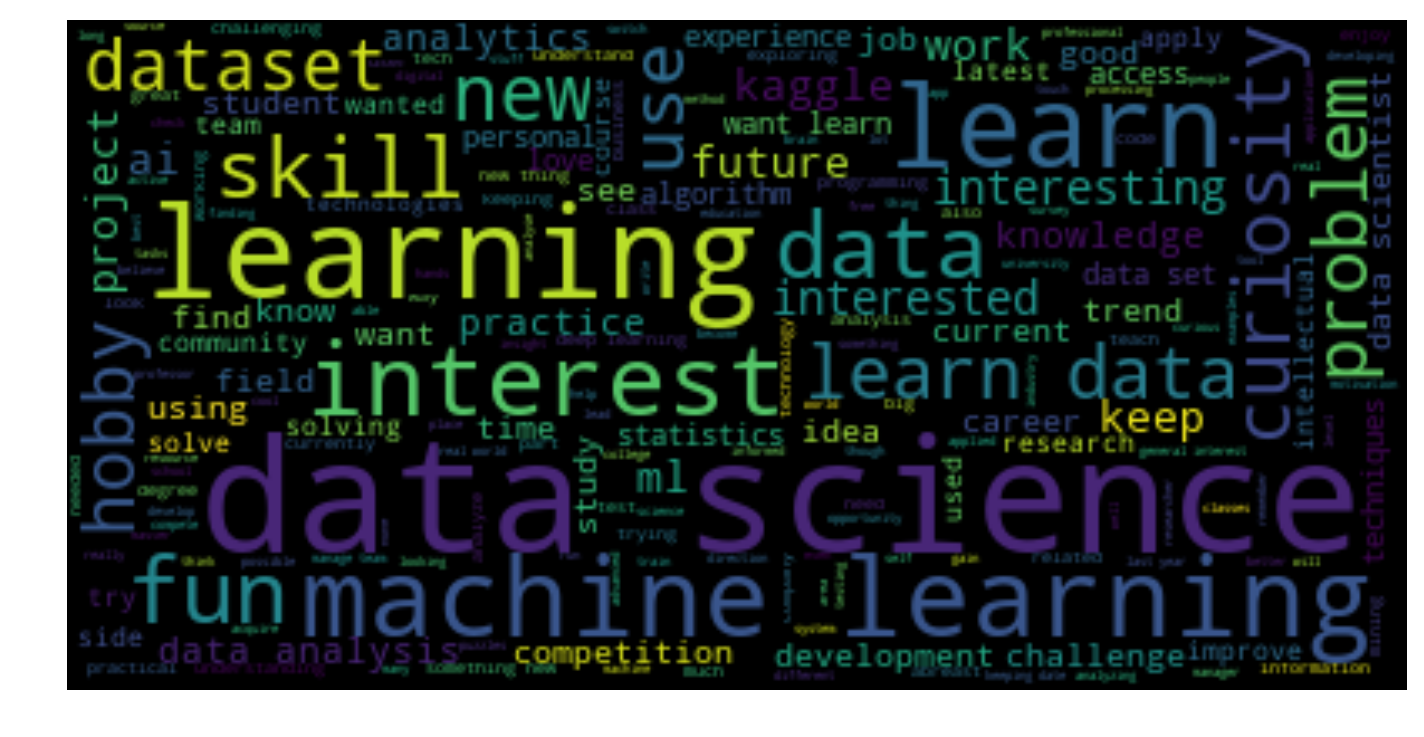

In [44]:
# KaggleMotivationFreeForm
schema[schema["Column"] == "KaggleMotivationFreeForm"]

ff["KaggleMotivationFreeForm"].dropna().str.lower().value_counts().head()

txt = " ".join(ff["KaggleMotivationFreeForm"].dropna().str.lower())
wordcloud = WordCloud().generate(txt)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
axes.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")



# Top reaons:
# "learning"
# "access to data sets"
# "informational" / "keep up with trends"
# "problems" / "competitions"
# "teaching"
# "Curiosity"
# "hobby"